# General system and one Buttiker lead added.

In [1]:
import kwant
import math
import cmath
from matplotlib import pyplot as plt
import numpy as np
import tinyarray


from scipy import optimize
import scipy
import time

In [2]:
import sys
sys.path.insert(0, '/Users/khhuisman/Documents/Jupyter_notebooks/py_files')

#### Plot functions 

In [3]:
import PlotFunctions

# Gold System Magnetized lead

In [4]:
import AuSHel_MagnetizedGoldLead_2T

In [5]:
# The system contains:
# "Gold leads" -"3x3x3 block of Gold atoms" - Helicene - "3x3x3 block of Gold atoms"  
#.             - "Toy leads with onsite energy e0,hopping t en Zeeman magnetic field B"
# delta_u = 9.9 - 1j*chi_ep chi_ep =0.1



def make_gold_system(B = 0.1,
                     nlayers = 3, xi_d = 0.6, xi_p = 0.006,
                    Txz = 3,Tyz = 3,d_L= 50,
                    txz_left_1=1,tyz_left_1=0,
                    txz_left_2=1,tyz_left_2=1,
                     
                    txz_left_3=0,tyz_left_3=1,
                    plot_left = False,
                    txz_right_1=1,tyz_right_1=0, 
                    txz_right_2=1,tyz_right_2=1,
                    txz_right_3=0,tyz_right_3=1,
                    plot_right = False,
                    nrings =6 ,tvec=3,E_z=0,r=1.4,zstart=0,b=3.6,
                    chirality_left=True,
                    u=-18+9.9 ,delta_e=-12.6,Es=-6.21):
    
    
    
    system = AuSHel_MagnetizedGoldLead_2T.make_system(nlayers, xi_d,xi_p ,
                Txz,Tyz, d_L,
                 txz_left_1,tyz_left_1,
                txz_left_2,tyz_left_2,
                txz_left_3,tyz_left_3,
                plot_left,
                txz_right_1,tyz_right_1, 
                txz_right_2,tyz_right_2,
                txz_right_3,tyz_right_3,
                plot_right ,
                nrings ,tvec,E_z,r,zstart,b,
                chirality_left,
                u,delta_e,Es,
                           B)
    
    
    
    
    systemf = system.finalized()
    return systemf

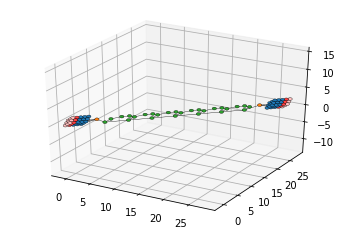

In [6]:
kwant.plot(make_gold_system(),hop_lw=0.1);

In [7]:
import CalculateCurrentN

# Calculate Transmissions

### System parameters

In [8]:
de = 0.1  # stepsize of energy grid
B  = 2.1      # magnetization


nleads = 2
ef = -5.3

In [9]:
emin = ef - 2.5
emax = ef + 2.5
print(emin,emax)

-7.8 -2.8


In [10]:
Vmax = emax - emin
print(Vmax)

5.0


# System $\chi = +1$

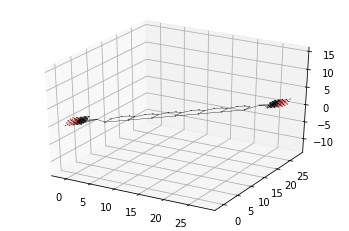

In [11]:
systemf_P =  make_gold_system(B = abs(B),chirality_left=False)

kwant.plot(systemf_P,site_size=0.1,hop_lw=0.1);



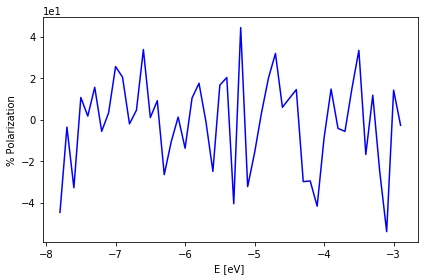

In [12]:
energies,pol_list_P,Tp_list_P = PlotFunctions.plot_pol(systemf_P,emin,emax,de)

# System: $\chi = -1$

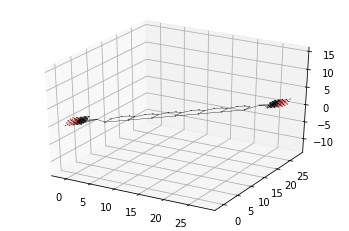

In [16]:
systemf_M =  make_gold_system(B = -abs(B),chirality_left=True)

kwant.plot(systemf_M,site_size=0.1,hop_lw=0.1);



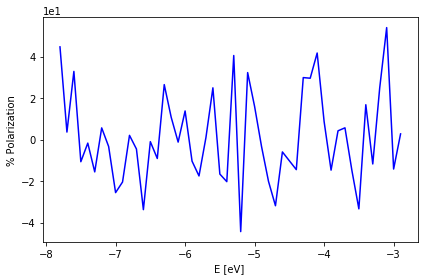

In [17]:
energies,pol_list_M,Tp_list_M = PlotFunctions.plot_pol(systemf_M,emin,emax,de)

# Plot Polarization 

# $P_z(m_z,\chi) + P_z(-m_z,-\chi)$ $\equiv$ 0

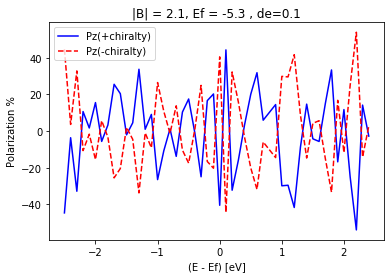

In [18]:
plt.title('|B| = {}, Ef = {} , de={}'.format(abs(np.round(B,1)),ef,np.round(de,3)))

plt.plot(energies - ef ,np.multiply(100,pol_list_P),label = 'Pz(+chiralty)',color = 'blue')
plt.plot(energies - ef,np.multiply(100,pol_list_M),label = 'Pz(-chiralty)',color = 'red', linestyle = '--')


plt.legend()
# plt.xlim(-1,1)
# plt.ylim(-5,5)



plt.ylabel("Polarization %")


plt.xlabel("(E - Ef) [eV]")
plt.show() 

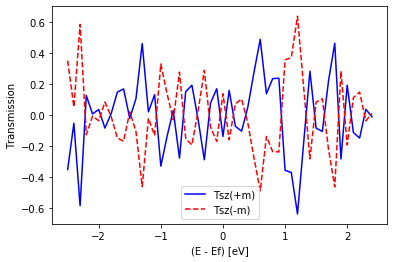

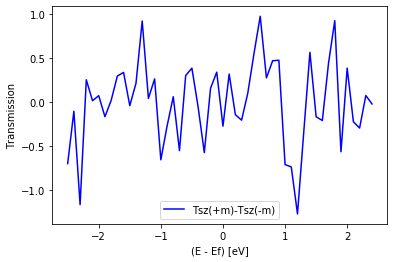

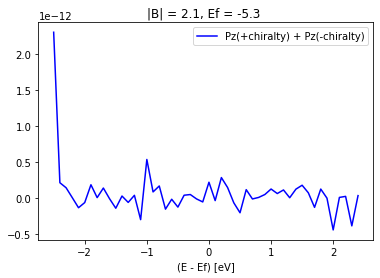

In [16]:
plt.title('|B| = {}, Ef = {} '.format(abs(np.round(B,1)),ef))

plt.plot(energies - ef ,np.add(pol_list_P,pol_list_M),label = 'Pz(+chiralty) + Pz(-chiralty)',color = 'blue')
# plt.plot(energies - ef ,np.subtract(pol_list_P,pol_list_M),label = 'Pz(+chiralty) - Pz(-chiralty)',color = 'red')



plt.legend()

plt.xlabel("(E - Ef) [eV]")
plt.show() 

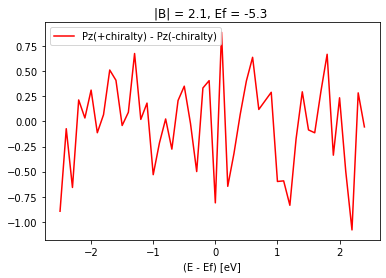

In [17]:
plt.title('|B| = {}, Ef = {} '.format(abs(np.round(B,1)),ef))

# plt.plot(energies - ef ,np.add(pol_list_P,pol_list_M),label = 'Pz(+chiralty) + Pz(-chiralty)',color = 'blue')
plt.plot(energies - ef ,np.subtract(pol_list_P,pol_list_M),label = 'Pz(+chiralty) - Pz(-chiralty)',color = 'red')



plt.legend()

plt.xlabel("(E - Ef) [eV]")
plt.show() 

# $P_z(m,\chi) - P_z(-m,\chi)$ $\neq$ 0

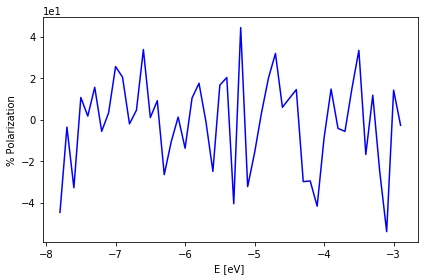

In [30]:
systemf_P =  make_gold_system(B = abs(B),chirality_left=False)


energies,pol_list_P,Tp_list_P = PlotFunctions.plot_pol(systemf_P,emin,emax,de)

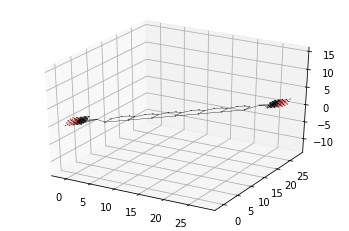

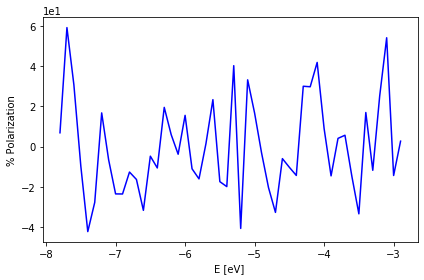

In [31]:
systemf_M =  make_gold_system(B = -abs(B),chirality_left=False)

kwant.plot(systemf_M,site_size=0.1,hop_lw=0.1);

energies,pol_list_M,Tp_list_M = PlotFunctions.plot_pol(systemf_M,emin,emax,de)

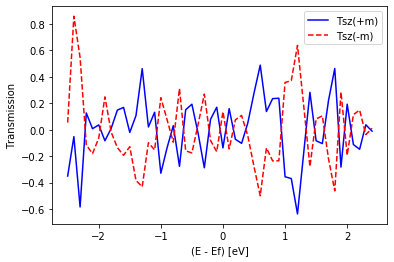

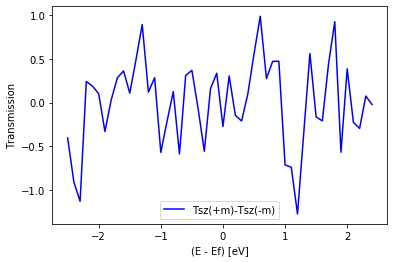

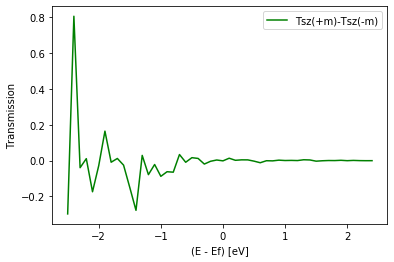

In [33]:
plt.plot(energies - ef ,Tp_list_P,label = 'Tsz(+m)',color = 'blue')
plt.plot(energies - ef,Tp_list_M,label = 'Tsz(-m)',color = 'red', linestyle = '--')


plt.legend()
# plt.xlim(-1,1)
# plt.ylim(-5,5)



plt.ylabel("Transmission")


plt.xlabel("(E - Ef) [eV]")
plt.show() 

plt.plot(energies - ef ,np.subtract(Tp_list_P,Tp_list_M),label = 'Tsz(+m)-Tsz(-m)',color = 'blue')
# plt.plot(energies - ef,,label = 'Tsz(-m)',color = 'red', linestyle = '--')


plt.legend()
# plt.xlim(-1,1)
# plt.ylim(-5,5)



plt.ylabel("Transmission")


plt.xlabel("(E - Ef) [eV]")
plt.show() 

plt.plot(energies - ef ,np.add(Tp_list_P,Tp_list_M),label = 'Tsz(+m)-Tsz(-m)',color = 'green')
# plt.plot(energies - ef,,label = 'Tsz(-m)',color = 'red', linestyle = '--')


plt.legend()
# plt.xlim(-1,1)
# plt.ylim(-5,5)



plt.ylabel("Transmission")


plt.xlabel("(E - Ef) [eV]")
plt.show() 

### Save Values: Polarizations

In [33]:

# file = open("pol_list_P{}_de_{}_ef_{}_chiral{}.txt".format(abs(B),de,ef,True),'w')
# np.savetxt(file,pol_list_P )
# file.close()

# file = open("pol_list_M{}_de_{}_ef_{}_chiral{}.txt".format(abs(B),de,ef,False),'w')
# np.savetxt(file,pol_list_M )
# file.close()

# file = open("energies{}_de_{}_ef_{}.txt".format(abs(B),de,ef),'w')
# np.savetxt(file,energies )
# file.close()





In [34]:
de = 0.01  # stepsize of energy grid
B  = 2.1       # magnetization


nleads = 2
ef = -5.3

In [51]:
pol_list_P_loaded = np.loadtxt("pol_list_P{}_de_{}_ef_{}_chiral{}.txt".format(abs(B),de,ef,True))
pol_list_M_loaded = np.loadtxt("pol_list_M{}_de_{}_ef_{}_chiral{}.txt".format(abs(B),de,ef,False))


energies_loaded = np.loadtxt("energies{}_de_{}_ef_{}.txt".format(abs(B),de,ef))

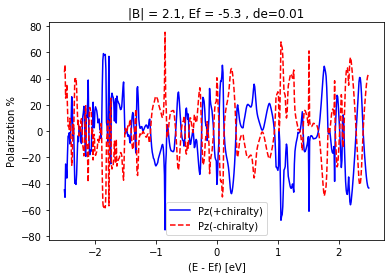

In [53]:
plt.title('|B| = {}, Ef = {} , de={}'.format(abs(np.round(B,1)),ef,np.round(de,3)))

plt.plot(energies_loaded - ef ,np.multiply(100,pol_list_P_loaded),label = 'Pz(+chiralty)',color = 'blue')
plt.plot(energies_loaded - ef,np.multiply(100,pol_list_M_loaded),label = 'Pz(-chiralty)',color = 'red', linestyle = '--')


plt.legend()
# plt.xlim(-1,1)
# plt.ylim(-5,5)



plt.ylabel("Polarization %")


plt.xlabel("(E - Ef) [eV]")
plt.show() 

In [62]:
# save_path = '/Users/khhuisman/Desktop/Results _Paper/Magnetic_System/'

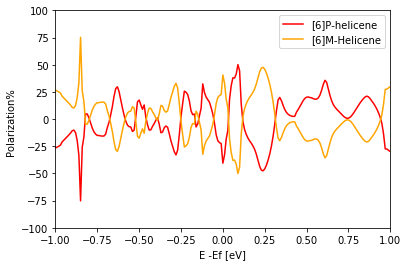

In [64]:
# ef = HandyFunctions.fermi_gold_shifted(True) 
# plt.title('--- Ef ={}, nrings = {} ---'.format(np.round(ef,1),6))
plt.plot(energies_loaded - ef
             , 100*np.array(pol_list_P_loaded), color = 'red' ,label = '[6]P-helicene')
plt.plot(energies_loaded- ef
             , 100*np.array(pol_list_M_loaded), color = 'orange',label = '[6]M-Helicene')
# plt.plot(energiesP - ef
#              , 100*(np.array(pol_M6_load)+np.array(pol_P6_load)), color = 'green',label = 'sum')

    
plt.xlabel("E -Ef [eV]")
plt.ylabel("Polarization%  ")
plt.xlim(-1,1)
plt.ylim(-100,100)
plt.legend(loc='upper right')

file_name = 'Pz_MP6_helicene_magnetic'
# file_name = 'test'


full_path = save_path + file_name


plt.savefig(fname =full_path,dpi=200)


plt.show()